In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Rotations**

**With understanding stereo, it is important to understand the concept of 3D rotations, since the relationship between the two cameras in a stereo setup often involves a rotation from one to the other.**

**Let's explore how rotations can be represented in different ways. Run the custom_rotate below.**

In [21]:
def custom_rotate(rotation_method, v1=None, v2=None, v3=None, v4=None, v5=None):
    """ Plots five vectors in 3D. One vector is fixed, and the others are that vector
      rotated by 90 degrees in the x axis, 90 degrees in the y axis, 90 degrees in
      the z axis, and one with a more complex rotation.

      The four plots are of the same graph, but with different viewpoints. Feel 
      free to edit the azimuth and/or elevation to any of the views if you want
      to visualize your plot differently.

      Args:
        rotation_method: Function that performs the rotation

    """

    # Create the vector and rotate them accordingly
    vector = np.array([[11.231303753070549], [9.27144871768164], [18.085790226916288]]) if v1 is None else v1
    vecto2 = rotation_method(vector, np.pi/2, 0, 0) if v2 is None else v2
    vecto3 = rotation_method(vector, 0, np.pi/2, 0) if v3 is None else v3
    vecto4 = rotation_method(vector, 0, 0, np.pi/2) if v4 is None else v4
    vecto5 = rotation_method(vector, 0.5, 1.2, -0.2) if v5 is None else v5

    # Helper to plot the vectors
    def plot_transformed_vectors(ax):
        ax.plot([vector[0], 0], [vector[1], 0], [vector[2], 0],color='k',zorder=1)
        ax.plot([vecto2[0], 0], [vecto2[1], 0], [vecto2[2], 0],color='r',zorder=1)
        ax.plot([vecto3[0], 0], [vecto3[1], 0], [vecto3[2], 0],color='g',zorder=1)
        ax.plot([vecto4[0], 0], [vecto4[1], 0], [vecto4[2], 0],color='b',zorder=1)
        ax.plot([vecto5[0], 0], [vecto5[1], 0], [vecto5[2], 0],color='m',zorder=1)
        ax.set_xlabel('X direction')
        ax.set_ylabel('Y direction')
        ax.set_zlabel('Z direction')

    # Create plot figure structure
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')
    ax4 = fig.add_subplot(224, projection='3d')

    # Plot the vector and its rotated versions
    plot_transformed_vectors(ax1)
    plot_transformed_vectors(ax2)
    plot_transformed_vectors(ax3)
    plot_transformed_vectors(ax4)

    ax1.view_init(elev=10, azim=30)
    ax2.view_init(elev=10, azim=90)
    ax3.view_init(elev=10, azim=0)
    ax4.view_init(elev=90, azim=0)

**Let's explore how to represent rotations as a matrix form, using fundamental rotations.**

**Complete the function below, by writing in Rx, Ry, and Rz, which correspond to the fundamental rotations in x, y, and z. Run it to plot the rotations.**

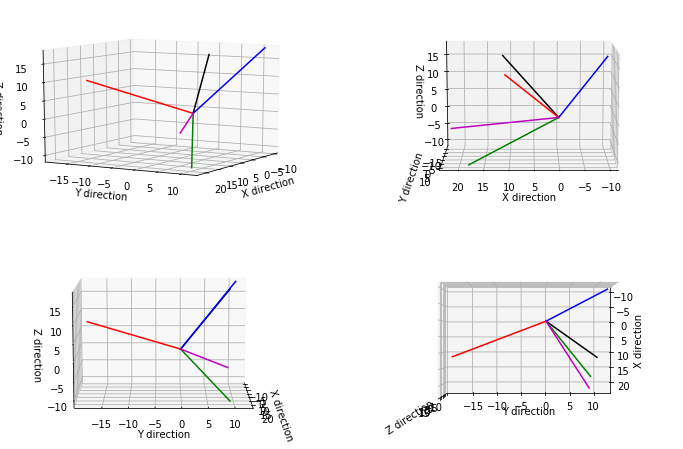

In [24]:
rotatex = lambda phi: np.array([[1, 0, 0],[0, np.cos(phi), -np.sin(phi)], [0, np.sin(phi), np.cos(phi)]])
rotatey = lambda theta: np.array([[np.cos(theta), 0, np.sin(theta)],[0, 1, 0],[-np.sin(theta), 0, np.cos(theta)]])
rotatez = lambda xi: np.array([[np.cos(xi), -np.sin(xi), 0],[np.sin(xi), np.cos(xi), 0], [0, 0, 1]])

def rotate_via_matrix_xyz(vector, phi=0, theta=0, xi=0):
    """ Rotates vector by a rotation composed of x by angle phi, y by angle theta,
      and z by angle xi. Does this by applying fundamental rotations RxRyRz.

      Args:
        vector: 3x1 numpy array of the vector
        phi: rotation angle in radians around x axis
        theta: rotation angle in radians around y axis
        xi: rotation angle in radians around z axis

      Return: 
        RxRyRz*vector: 3x1 numpy array of the rotated vector
    """

    # Construct the fundamental rotations using np.cos and np.sin
    Rx = rotatex(phi)
#     print('Rx\n', np.round(Rx,2))
    
    Ry = rotatey(theta)
#     print('Ry\n', np.round(Ry,2))
    
    Rz = rotatez(xi)
#     print('Rz\n', np.round(Rz, 2))


    return Rx @ Ry @ Rz @ vector

custom_rotate(rotate_via_matrix_xyz)
# rotate_via_matrix_xyz(np.array([0,0,0]), np.pi/4, np.pi/4, np.pi/4)

**What coloured lines correspond to what rotations?**

* Black: $I_3$
* Red: $R_x( \pi/2 )$
* Green: $R_y( \pi/2)$
* Blue: $R_z(\pi/2)$
* Magenta: all 3 axis rotation

**One important property with using rotation matrix representations is that they are not commutative. That is, the order of rotations matter!.**

**Complete the function below, again just filling in the representations for the fundamental rotations below (they are identical to above, I'm just not giving them to you so you won't copy it in the first part). Notice that now, the rotation RzRyRx instead of RxRyRz.**

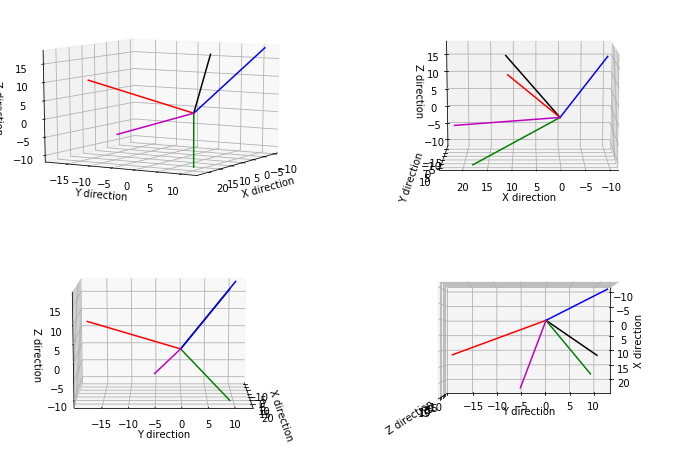

In [25]:
def rotate_via_matrix_zyx(vector, phi=0, theta=0, xi=0):
    """ Rotates vector by a rotation composed of x by angle phi, y by angle theta,
      and z by angle xi. Does this by applying fundamental rotations RxRyRz.

      Args:
        vector: 3x1 numpy array of the vector
        phi: rotation angle in radians around x axis
        theta: rotation angle in radians around y axis
        xi: rotation angle in radians around z axis

      Return: 
        RzRyRx*vector: 3x1 numpy array of the rotated vector
    """

    # Construct the fundamental rotations using np.cos and np.sin
    Rx = rotatex(phi)
    Ry = rotatey(theta)
    Rz = rotatez(xi)


    return Rz @ Ry @ Rx @ vector

custom_rotate(rotate_via_matrix_zyx)

**Instead of rotation matrices, we can also represent rotations using quaternions, which you can think of for now as a complex-number type representation of a rotation that contains a scalar part and a vector part. See below four different quaternions.**

**Below, apply these rotations to vector v1, and plot them using custom_rotate.**

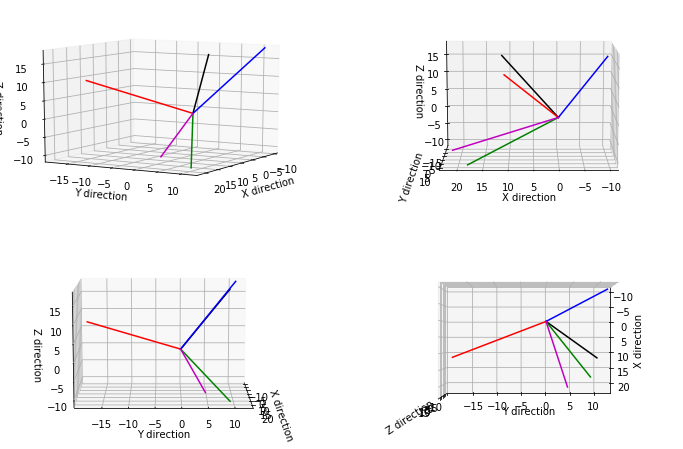

In [26]:
from scipy.spatial.transform import Rotation as R

# Original vector
v1 = np.array([11.231303753070549, 9.27144871768164, 18.085790226916288])

# Four different quaternion rotations
r2 = R.from_quat([ 0.7071068, 0, 0, 0.7071068 ])
r3 = R.from_quat([0, 0.7071068, 0, 0.7071068])
r4 = R.from_quat([ 0, 0, 0.7071068, 0.7071068 ])
r5 = R.from_quat([ -0.0719725, 0.6031058, -0.1374307, 0.7824296 ])

# Apply the rotations to our vector via rx.apply(v1)
v2 = r2.apply(v1)
v3 = r3.apply(v1)
v4 = r4.apply(v1)
v5 = r5.apply(v1)

# Plots
custom_rotate(None, v1, v2, v3, v4, v5)

**What kind of rotations (i.e. what angle in x, y, z axis rotations) do each of the quaternions represent?**

* `r2`: `rotatex` $\pi/2$
* `r3`: `rotatey` $\pi/2$
* `r4`: `rotatez` $\pi/2$
* `r5`: combination of the three axes

**We can also represent rotations using a rotation angle representation. Rotations in 3D can always be represented by a rotation around a vector/axis by an angle, and this rotation vector representation is exactly this, with the direction representing the axis of rotation, and the magnitude of the vector representing the amount of rotation.**

**Like with the quaternions above, apply these rotations to vector v1, and plot them using custom_rotate.**

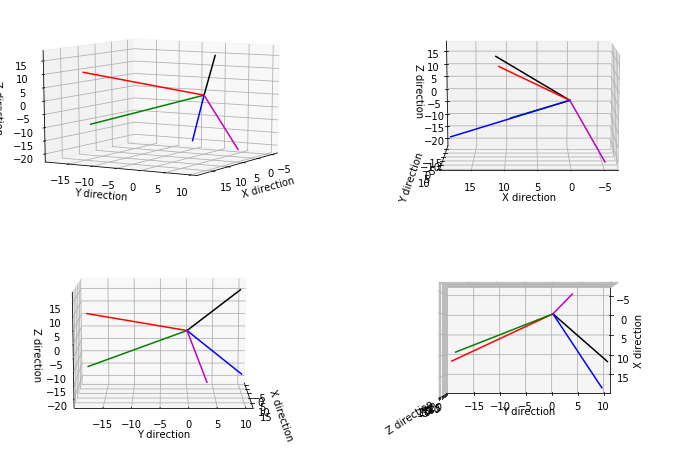

In [27]:
# Four different rotations using rotation vector representation
r1 = R.from_rotvec([np.pi/2, 0, 0])
r2 = R.from_rotvec([0, np.pi/2, 0])
r3 = R.from_rotvec([0, 0, np.pi/2])
r4 = R.from_rotvec([ -0.1553866, 1.3020895, -0.2967093 ])

# Apply the rotations to our vector via rx.apply(v1)
v2 = r1.apply(v1)
v3 = r2.apply(v2)
v4 = r3.apply(v3)
v5 = r4.apply(v4)

# Plots
custom_rotate(None, v1, v2, v3, v4, v5)

**What kind of rotations (i.e. what angle in x, y, z axis rotations) do each of the representations**

* `r1`: `rotatex` $\pi/2$
* `r2`: `rotatey` $\pi/2$
* `r3`: `rotatez` $\pi/2$
* `r4`: combination of the three axes

### **Disparity maps**

**Now let's explore stereo! Stereo involves two camera images of the same scene, at slightly different angles, and we are able to determine the depth of an object by comparing the locations of that object in those images.**

**We can explore how to do this by forming a disparity map, which shows, for every pixel, the depth of that object in the scene.**

**Run the code below to import the image and display them horizontally.**

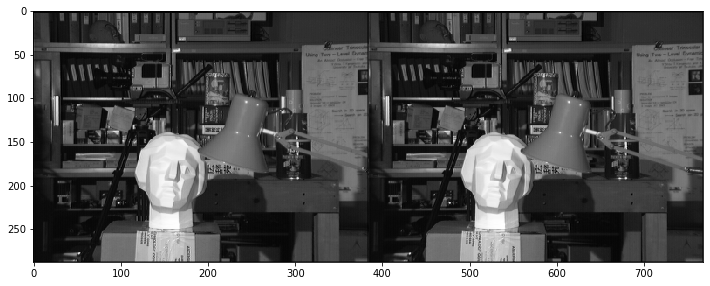

In [28]:
imgL = cv2.imread('tsukuba_l.png',0)
imgR = cv2.imread('tsukuba_r.png',0)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.hconcat([imgL, imgR]), cmap='gray')

**We can use OpenCV's cv2.StereoBM_create to create the disparity map. Set the numDisparities=16 and blockSize=15, and then use the .compute function to create the disaprity map. Display the resulting disparity map.**

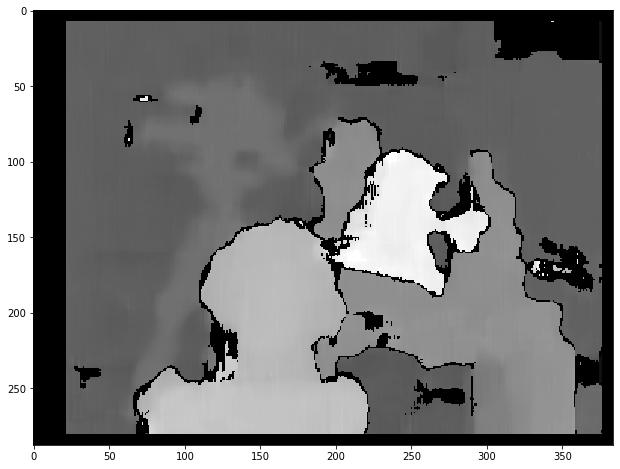

In [31]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

disp_map = stereo.compute(imgL, imgR)

plt.figure(figsize=(12,8))
plt.imshow(disp_map, cmap='gray')

**We see that the disparity map is pretty impressive and close to what we would expect. Now let's implement our own version to see how well we can do compared to this.**

**Because the relationships between our left and right cameras is a pure horizontal translation, we know that every pixel on the left image can only appear in the same row in the right image. Hence for every pixel in the left image, we have to find the same pixel in the right image on the same row.**

**To find the best match, we can take a window around the pixel in question in the left image, and slide a window across the right image and comparing them at each position. The position at which the windows have the best match is our disparity for that pixel.**

**Hence we need a metric determine how well two patches/windows correspond to each other. Let's implement a few.**

**Implement SAD matching below between the left_roi and right_roi. If the two rois are of different sizes, return a default -1 value.**

In [50]:
def SAD(left_roi, right_roi):
    """ Sum of Absolute Differences metric to compare two roi patches

      Args:
        left_roi: 2D numpy array containing the left image patch 
        right_roi: 2D numpy array containing the right image patch

      Return:
        score: The score of the match

    """

    # Implement this here
    
    if left_roi.shape != right_roi.shape:
        score = -1
        
    # if
    
    else:
        score = np.abs(left_roi - right_roi).sum()


    return score

# SAD

**Implement SSD matching below between the left_roi and right_roi. If the two rois are of different sizes, return a default -1 value.**

In [51]:
def SSD(left_roi, right_roi):
    """ Sum of Squared Differences metric to compare two roi patches

      Args:
        left_roi: 2D numpy array containing the left image patch 
        right_roi: 2D numpy array containing the right image patch

      Return:
        score: The score of the match

    """

    # Implement this here
    
    if left_roi.shape != right_roi.shape:
        score = -1
        
    # if
    
    else:
        score = ((left_roi - right_roi)**2).sum()
    
    # else

    return score

# SSD

**Implement NCC matching below between the left_roi and right_roi. If the two rois are of different sizes, return a default -1 value.**

In [53]:
def NCC(left_roi, right_roi):
    """ Normalized Cross Correlation metric to compare two roi patches

      Args:
        left_roi: 2D numpy array containing the left image patch 
        right_roi: 2D numpy array containing the right image patch

      Return:
        score: The score of the match

    """

    # Implement this here
    if left_roi.shape != right_roi.shape:
        score = -1
        
    # if
    
    else:
        score = 1 - np.sum(left_roi * right_roi)/np.linalg.norm(left_roi)/np.linalg.norm(right_roi)
    
    # else

    return score


**If two patches are a perfect match, would you expect the return values for these three to be large or small? Why can we return -1 if the sizes do not match and have confidence that no two rois will lead to a score of -1?**

I would expect the scores to be a small value if they are perfect matches for SAD and SSD, but a large value for NCC.

Corrected NCC to alter scale NCC $\in [-1,1]$ where $1$ is the best score. Used 1 - NCC

We can return -1 if the rois don't match in size because the image patches should be of a similar size. All scores are between $[0, \infty)$ 

**Now that we have a way of comparing how similar two patches are, let's write a function that compares a patch from the left image to all of the patches in the right image on the same row. For implementation simplicity, the "window" that we take around our pixel is from [y:y+window_size, x:x+window_size]. Fill in the blanks below.**

In [58]:
def compare_blocks(y, x, left_patch, right_image, window_size, max_disparity, criterion):
    """ Finds the best match between the left_patch and a patch from the right_image. Because
      we have a non-verged system, we only have to check along the same row as our patch.

      Args:
        y: The y coordinate of the top left pixel in the left_patch
        x: The x coordinate of the top left pixel in the left_patch
        left_patch: The template patch from left image to match
        right_image: The right image that we're trying to search for the best match for
        window_size: The length of one side of the square patch
        max_disparity: The maximum disparity that we need to check through
        criterion: How we compare similarity between two patches

      Return:
        min_index: (y, x) the coordinate in the right image that is the best match

    """

    # Get search range for the right image (we only have to search a maximum of max_disparity patches)
    x_min = max(0, x - max_disparity)
    x_max = min(right_image.shape[1], x + max_disparity)

    # Minimum SAD score, and the patch location (y, x) that corresponds to this minimum score
    min_sad = np.inf
    min_index = None

    for x in range(x_min, x_max):

        # Get the patch from the right image at (y, x)
        right_patch = right_image[y : y + window_size, x:x+window_size]

        # Get the score
        sad = criterion(left_patch, right_patch)

        # Update min_sad and min_index appropriately
        if 0 <= sad < min_sad:
            min_sad = sad
            min_index = [y, x]
            
        # if

    return min_index

**Now we just have to loop through every patch in the left image to find the corresponding patch in the right image.**

In [59]:
def get_disparity_map(imgL, imgR, window_size, max_disparity, criterion):
    """ Creates the disparity map by getting the x-displacement that corresponds to the best 
      match in the right image for every pixel in the left image.

      Args:
        imgL: The left image
        imgR: The right image
        window_size: The dimension of the patch to compare around the pixel
        max_disparity: 

    """
    imgL = imgL.astype(int)
    imgR = imgR.astype(int)
    h, w = imgL.shape
    disparity_map = np.zeros((h, w))

    # Go over each pixel position
    for y in range(0, h-window_size):
        for x in range(0, w-window_size):

            # Get the window for pixel (y, x) from imgL
            # Remember that our window is not centered around the pixel but instead has top left corner at (y, x)
            left_patch = imgL[y:y + window_size, x:x + window_size]

            # Find the minimum index, and fill in the disparity map accordingly
            min_index = compare_blocks(y, x, left_patch, imgR, window_size, max_disparity, criterion)
            disparity_map[y, x] = abs(min_index[1] - x)

    return disparity_map

**Let's give it a try! Run get_disparity_map with imgL and imgR, with window_size=7, max_disparity=56, and criterion=SAD. This might take a while (ãround 90 seconds for me on Google Colab). Display the result, along with a colorbar.**

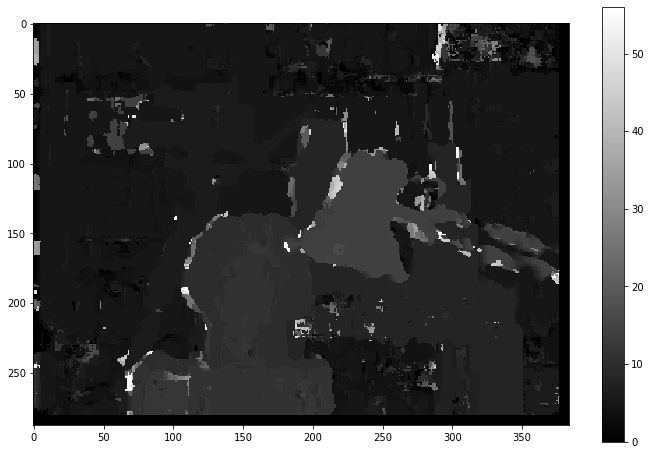

In [60]:
disp_map_sad = get_disparity_map(imgL, imgR, window_size=7, max_disparity=56, criterion=SAD)

plt.figure(figsize=(12,8))
plt.imshow(disp_map_sad, cmap='gray')
plt.colorbar()

**Do objects closer to the camera have a higher or lower disparity? Why is that so?**

Objects closer to the image have a higher disparity because they appear to move more.

**Notice that we defined our window at (y, x) to have the top left corner at (y, x) instead of centered around (y, x), yet we still get a good result - why is that?**

Because the matching is still based on the total window size. We had a fairly small window. to localize the change.

**Now run it on a larger window_size of 21, and display the result.**

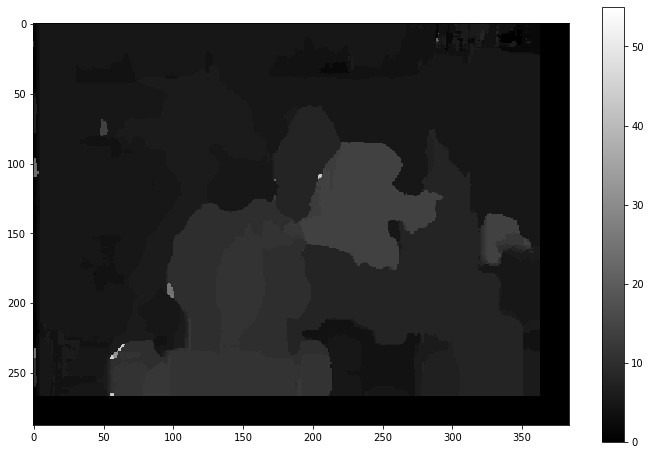

In [61]:
disp_map_sad = get_disparity_map(imgL, imgR, window_size=21, max_disparity=56, criterion=SAD)

plt.figure(figsize=(12,8))
plt.imshow(disp_map_sad, cmap='gray')
plt.colorbar()

**Now run it with window_size=7 and the criterion now SSD instead of SAD. Display the result.**

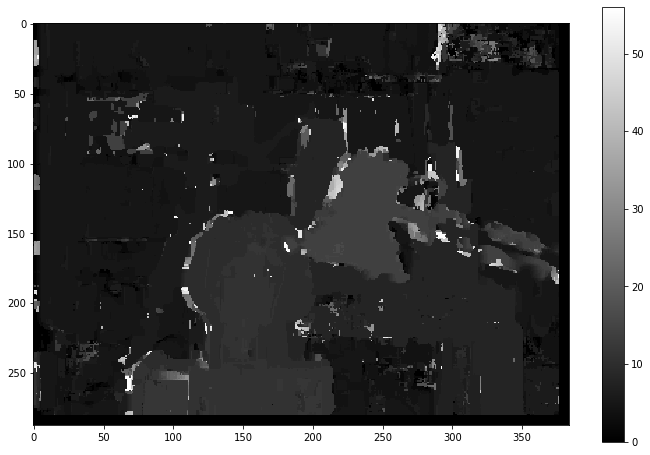

In [62]:
disp_map_sad = get_disparity_map(imgL, imgR, window_size=7, max_disparity=56, criterion=SSD)

plt.figure(figsize=(12,8))
plt.imshow(disp_map_sad, cmap='gray')
plt.colorbar()

**Do the same above, this time using NCC.**

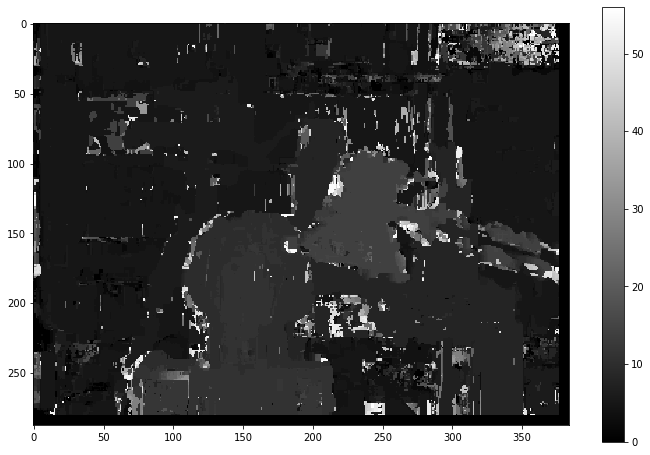

In [63]:
disp_map_sad = get_disparity_map(imgL, imgR, window_size=7, max_disparity=56, criterion=NCC)

plt.figure(figsize=(12,8))
plt.imshow(disp_map_sad, cmap='gray')
plt.colorbar()

**After running those, you're probably annoyed because they take a while to run. So let's speed it up. Observe that finding the disparity for every single row is indepedent of each other, so we can find the disparities for each row simultaneously. We simply need to shift the entire right image one pixel at a time, and each time, we compute the pixel-wise difference between the left image and the shifted right image. Hence we now have $diffs(i, j) = left(i, j) - right(i, j + k)$, where $k$ is the amount of shift.** 

**Since we are interested in the sum of these differences in a window around each pixel (since we are implementing SAD), we can simply convolve the difference matrix with a uniform box filter to get the score for each pixel!**

**Fill in the blanks below, and run it, observing how much faster it is.**

In [64]:
from scipy.signal import convolve2d

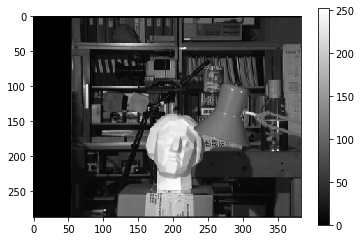

In [77]:
rows, cols = imgL.shape   # convolve2dimensions
num_disparities = 56      # number of disparities to check
block = 7                 # window size to match

# Create the block by block sized kernel, normalized to have unit sum
kernel = np.ones((block,block))/block**2

# Create a disparity map that saves the score for each disparity 
disparity_maps = np.zeros([imgL.shape[0], imgL.shape[1], num_disparities])

# We loop through for each disparity we have to shift by
for d in range(0, num_disparities):

    # Shift imgR by d pixels to the right
    imgR_d = np.pad(imgR[:,:cols-d], ((0,0),(d,0)))

    # Calculate the absolute differences between each pixel in imgL and the shifted imgR
    difference = np.abs(imgL - imgR_d)

    # Convolve the resulting difference matrix with the kernel
    filtered_image = convolve2d(difference, kernel, mode='same')

    # Filtered image has the SAD of each pixel for this disparity
    disparity_maps[:, :, d] = filtered_image

# We then find the minimum disparity value at each pixel and normalize the scale
disparity = np.argmin(disparity_maps, axis=2)
disparity = np.uint8(disparity * 255 / num_disparities)

# Display the image
plt.imshow(imgR_d, cmap='gray')
plt.colorbar()
plt.show()

### **Camera Calibration with OpenCV**

**Here's just a quick run-throug with the camera calibration from OpenCV - this is mainly to get you to make sure that you know what the different components to calibrate a camera are when using OpenCV. Fill in the blanks, and answer the questions below.**

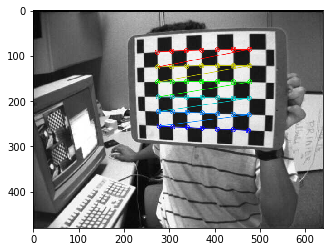

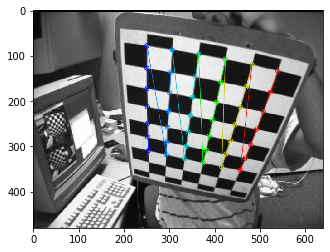

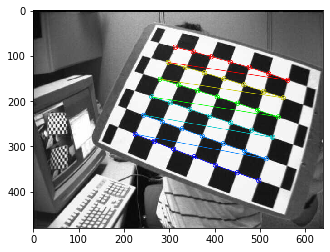

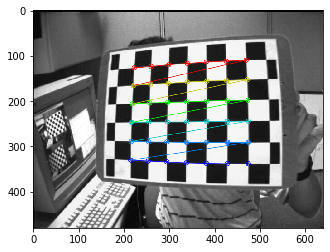

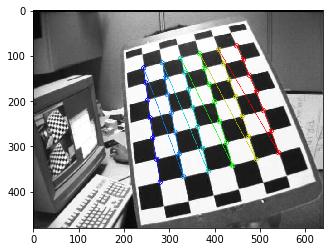

In [80]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = ['left01.jpg', 'left02.jpg', 'left03.jpg', 'left04.jpg', 'left05.jpg']
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6))

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        # Compute subpixel corner accuracy via cv2.cornerSubPix
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        plt.figure()
        plt.imshow(img)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

**When calling cv2.findChessboardCorners, one of the arguments is (7, 6). What does this represent?**

This represents the number of corners on the chess board

**What does each argument in cv2.cornerSubPix represent?**

* image - the image to look up
* corners - the detected corners
* winsize - the window size to look for the corners
* zeroZone - the deadzone region
* criteria - stop search criteria

**Feel free to pick any of the images and perform unwarping of them below. Display the results.**

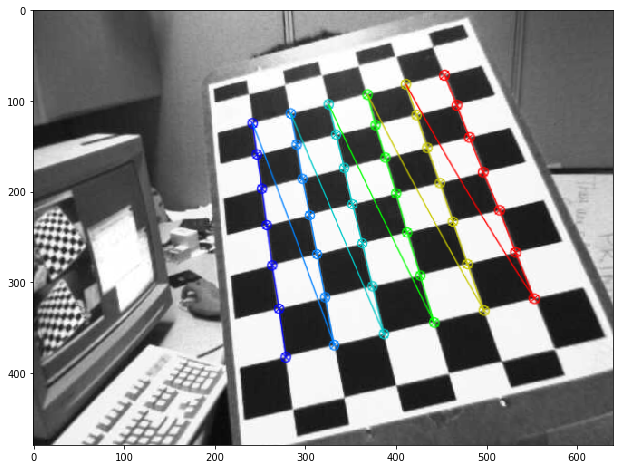

In [81]:
rect_img = cv2.undistort(img, mtx, dist, None, None)

plt.figure(figsize=(12,8))
plt.imshow(rect_img)